# Cars

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy import stats
from scipy.stats import norm
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

In [3]:
df = pd.read_csv('carData.csv', sep=',')
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
df.shape

(301, 9)

In [6]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


array([[<AxesSubplot:title={'center':'Year'}>,
        <AxesSubplot:title={'center':'Selling_Price'}>],
       [<AxesSubplot:title={'center':'Present_Price'}>,
        <AxesSubplot:title={'center':'Kms_Driven'}>],
       [<AxesSubplot:title={'center':'Owner'}>, <AxesSubplot:>]],
      dtype=object)

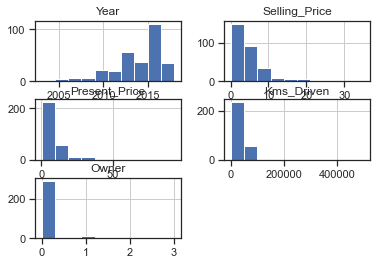

In [7]:
df.hist()

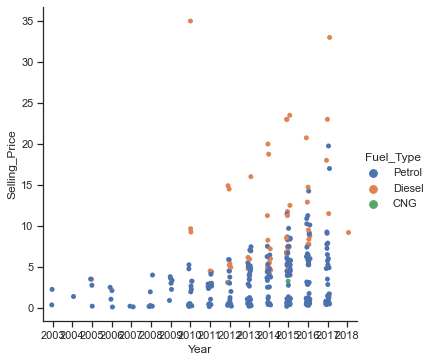

In [7]:
sns.set_theme(style="ticks")
g = sns.catplot(x="Year", y="Selling_Price", hue="Fuel_Type", data=df)
plt.rcParams["xtick.labelsize"] = 10

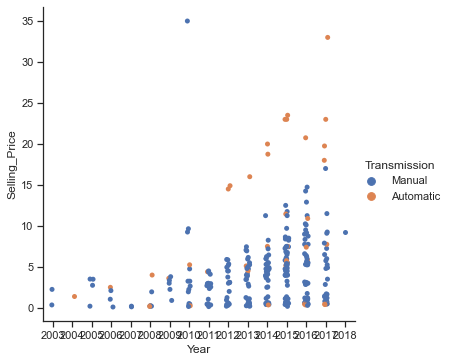

In [15]:
sns.set_theme(style="ticks")
g = sns.catplot(x="Year", y="Selling_Price", hue="Transmission", data=df)
plt.rcParams["xtick.labelsize"] = 10

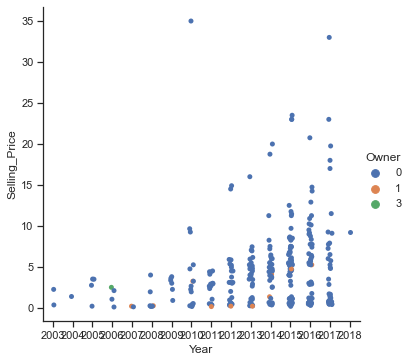

In [5]:
sns.set_theme(style="ticks")
g = sns.catplot(x="Year", y="Selling_Price", hue="Owner", data=df)
plt.rcParams["xtick.labelsize"] = 10

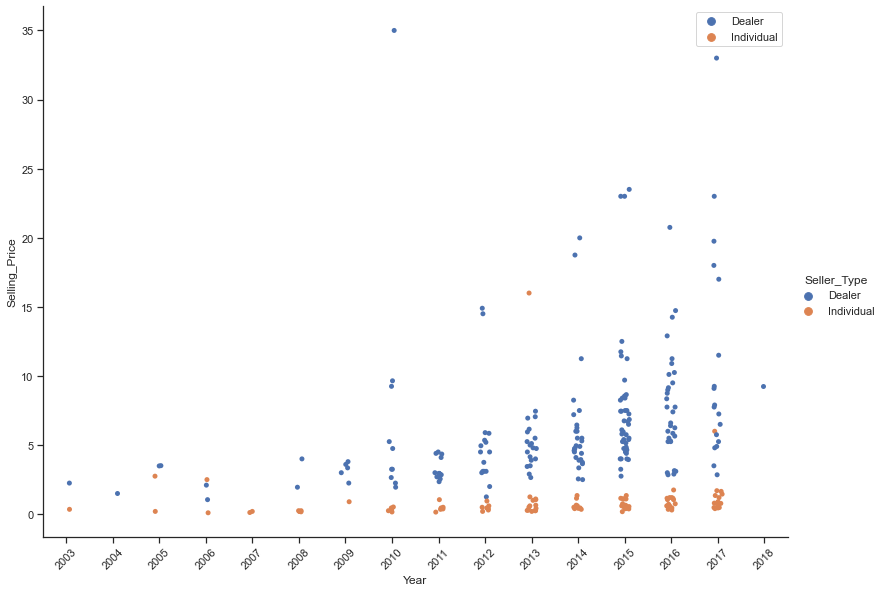

In [10]:
sns.set_theme(style="ticks")
g = sns.catplot(x="Year", y="Selling_Price", hue="Seller_Type", data=df,height=8, aspect=11/8)
g.set_xticklabels(rotation=45)
plt.legend()


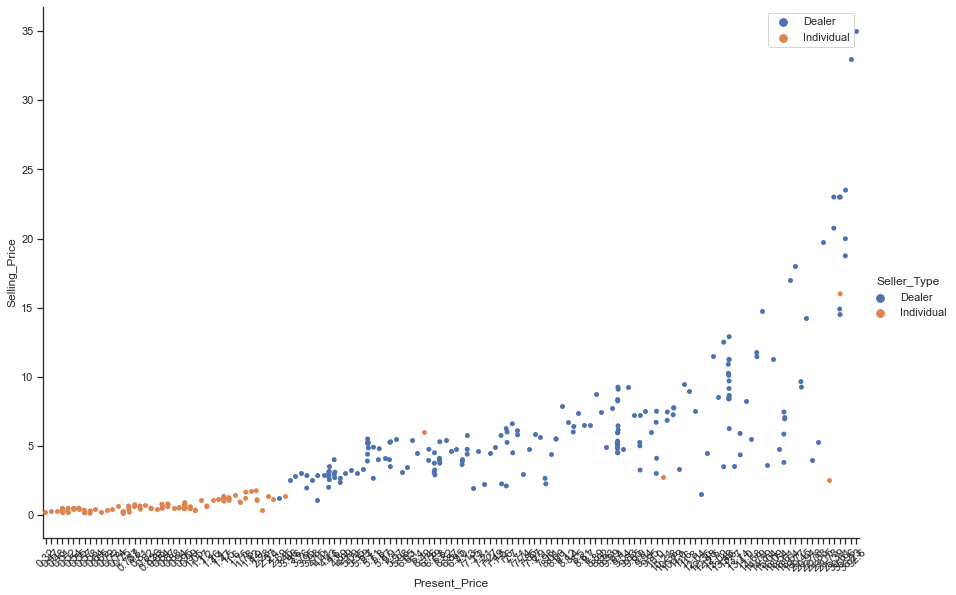

In [9]:
sns.set_theme(style="ticks")
g = sns.catplot(x="Present_Price", y="Selling_Price", hue="Seller_Type", data=df, height=8, aspect=12/8)
g.set_xticklabels(rotation=45)
plt.legend()

# Quantitfication avec pandas dummies

In [12]:
df = pd.read_csv('carData.csv', sep=',')
df.head()
dfq = pd.get_dummies(df, prefix=['Fuel'], columns=['Fuel_Type'])
dfq

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Seller_Type,Transmission,Owner,Fuel_CNG,Fuel_Diesel,Fuel_Petrol
0,ritz,2014,3.35,5.59,27000,Dealer,Manual,0,0,0,1
1,sx4,2013,4.75,9.54,43000,Dealer,Manual,0,0,1,0
2,ciaz,2017,7.25,9.85,6900,Dealer,Manual,0,0,0,1
3,wagon r,2011,2.85,4.15,5200,Dealer,Manual,0,0,0,1
4,swift,2014,4.60,6.87,42450,Dealer,Manual,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Dealer,Manual,0,0,1,0
297,brio,2015,4.00,5.90,60000,Dealer,Manual,0,0,0,1
298,city,2009,3.35,11.00,87934,Dealer,Manual,0,0,0,1
299,city,2017,11.50,12.50,9000,Dealer,Manual,0,0,1,0


In [13]:
df = pd.read_csv('carData.csv', sep=',')
df.head()
dfq = pd.get_dummies(df, prefix=['Seller'], columns=['Seller_Type'])
dfq

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Transmission,Owner,Seller_Dealer,Seller_Individual
0,ritz,2014,3.35,5.59,27000,Petrol,Manual,0,1,0
1,sx4,2013,4.75,9.54,43000,Diesel,Manual,0,1,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Manual,0,1,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Manual,0,1,0
4,swift,2014,4.60,6.87,42450,Diesel,Manual,0,1,0
...,...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Manual,0,1,0
297,brio,2015,4.00,5.90,60000,Petrol,Manual,0,1,0
298,city,2009,3.35,11.00,87934,Petrol,Manual,0,1,0
299,city,2017,11.50,12.50,9000,Diesel,Manual,0,1,0


# Quantitfication avec  SkLearn Ordinal Encoder

In [18]:
df = pd.read_csv('carData.csv', sep=',')
df.head()
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()
oe.fit(df[["Fuel_Type", "Seller_Type", "Transmission"]])
df[["Fuel_Type", "Seller_Type", "Transmission"]] = oe.transform(df[["Fuel_Type", "Seller_Type", "Transmission"]])
df


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,2.0,0.0,1.0,0
1,sx4,2013,4.75,9.54,43000,1.0,0.0,1.0,0
2,ciaz,2017,7.25,9.85,6900,2.0,0.0,1.0,0
3,wagon r,2011,2.85,4.15,5200,2.0,0.0,1.0,0
4,swift,2014,4.60,6.87,42450,1.0,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,1.0,0.0,1.0,0
297,brio,2015,4.00,5.90,60000,2.0,0.0,1.0,0
298,city,2009,3.35,11.00,87934,2.0,0.0,1.0,0
299,city,2017,11.50,12.50,9000,1.0,0.0,1.0,0


# Matrice de correlation

<AxesSubplot:>

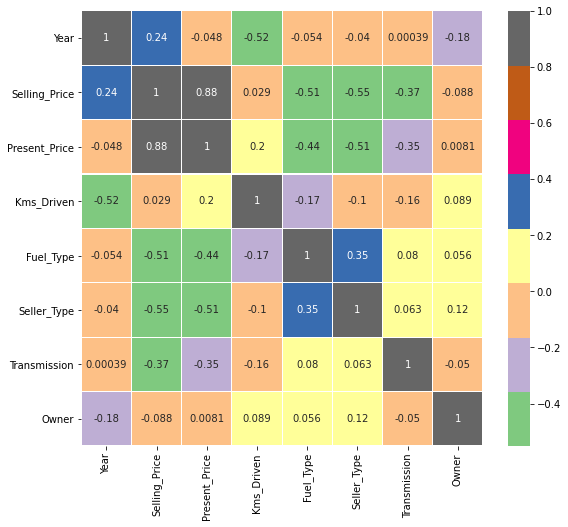

In [19]:
matrice_corr = df.corr()
f, ax = plt.subplots(figsize =(9, 8)) 
sns.heatmap(matrice_corr, ax = ax, cmap ="Accent", linewidths = 0.1,annot=True)

# Régression linéaire univariée avec Scipy.

LinregressResult(slope=0.4150916946355396, intercept=-831.1789245913283, rvalue=0.2361409801604273, pvalue=3.495472434809122e-05, stderr=0.0987819729376285)
slope: 0.415092   intercept: -831.178925
R-squared: 0.055763


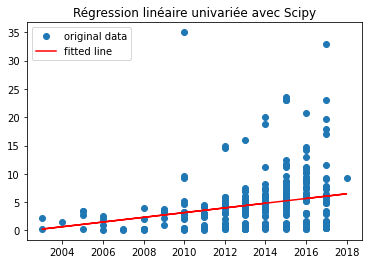

In [22]:
X = df.Year
y = df.Selling_Price
res = stats.linregress(df.Year, df.Selling_Price)
plt.plot(df.Year, df.Selling_Price, 'o', label='original data')
print(res)
slope, intercept, r_value, p_value, std_err = stats.linregress(X, y)
print("slope: %f   intercept: %f" % (slope, intercept))
print("R-squared: %f" % r_value**2)
plt.plot(df.Year, res.intercept + res.slope*df.Year, 'r', label='fitted line')
plt.legend()
plt.title("Régression linéaire univariée avec Scipy")
plt.show()

In [23]:
tinv = lambda p, df: abs(norm.ppf(p/2, df))
ts = tinv(0.05, len(X)-2)
print(f"slope (95%): {res.slope:.6f} +/- {ts*res.stderr:.6f}")
#print(f"intercept (95%): {res.intercept:.6f}"
#      f" +/- {ts*res.intercept_stderr:.6f}")

slope (95%): 0.415092 +/- 29.342201


# Régression linéaire univariée avec Numpy.

model =  [ 4.15091695e-01 -8.31178925e+02]
test predict year 2020 =  7.306298572461742
r2 score =  0.055762562511127545


Text(0.5, 1.0, 'Régression linéaire univariée avec Numpy')

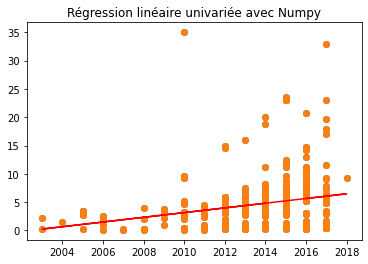

In [25]:
X = df.Year
y = df.Selling_Price
plt.scatter(X,y)
model = np.polyfit(X, y, 1)
print("model = ", model)
predict = np.poly1d(model)
test_year = 2020
print("test predict year 2020 = ", predict(test_year))
print("r2 score = ", r2_score(y, predict(X)))
x_lin_reg = X
y_lin_reg = predict(x_lin_reg)
plt.scatter(X, y)
plt.plot(x_lin_reg, y_lin_reg, c = 'r')
plt.title("Régression linéaire univariée avec Numpy")

# Régression linéaire univariée avec sklearn

In [30]:
from sklearn.linear_model import LinearRegression 

x_train = np.array(x_train)
x_test = np.array(x_test)

x_train = x_train.reshape(-1, 1)
x_test = x_test.reshape(-1, 1)

reg = LinearRegression(X,y)
reg.fit (X,y)

plt.scatter(X, y)
plt.plot(x_lin_reg, y_lin_reg, c = 'r')
plt.title("Régression linéaire univariée avec Sklearn")

C:\Users\bbeau\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass fit_intercept=0      2014
1      2013
2      2017
3      2011
4      2014
       ... 
296    2016
297    2015
298    2009
299    2017
300    2016
Name: Year, Length: 301, dtype: int64, normalize=0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


ValueError: Expected 2D array, got 1D array instead:
array=[2014 2013 2017 2011 2014 2018 2015 2015 2016 2015 2017 2015 2015 2015
 2009 2016 2015 2016 2015 2010 2016 2017 2011 2014 2013 2011 2013 2017
 2010 2015 2012 2011 2014 2014 2014 2011 2015 2003 2016 2003 2016 2014
 2008 2014 2012 2014 2013 2006 2015 2017 2012 2015 2017 2013 2005 2009
 2015 2010 2014 2014 2013 2015 2014 2015 2017 2014 2017 2010 2011 2016
 2014 2011 2013 2011 2014 2015 2013 2004 2010 2012 2016 2015 2017 2015
 2005 2006 2010 2012 2013 2014 2009 2014 2005 2015 2008 2012 2016 2017
 2013 2010 2016 2017 2017 2017 2017 2015 2014 2013 2016 2017 2016 2016
 2014 2016 2015 2015 2013 2015 2015 2013 2016 2011 2016 2013 2012 2009
 2017 2016 2017 2017 2017 2015 2017 2016 2017 2015 2014 2013 2016 2015
 2013 2016 2015 2016 2014 2012 2014 2015 2010 2016 2011 2016 2012 2013
 2014 2017 2017 2015 2017 2017 2011 2014 2012 2010 2016 2016 2016 2014
 2013 2015 2012 2015 2014 2017 2015 2011 2011 2016 2014 2010 2012 2016
 2013 2013 2008 2008 2010 2013 2013 2005 2008 2012 2007 2013 2008 2015
 2008 2010 2011 2007 2006 2010 2015 2011 2015 2016 2017 2015 2017 2015
 2012 2015 2016 2011 2017 2012 2016 2016 2014 2012 2017 2013 2014 2015
 2013 2011 2015 2011 2012 2012 2013 2017 2015 2013 2015 2017 2016 2015
 2013 2012 2012 2015 2014 2016 2013 2012 2012 2015 2013 2016 2016 2013
 2015 2014 2013 2012 2016 2015 2015 2014 2016 2016 2015 2016 2015 2017
 2014 2016 2017 2015 2011 2009 2015 2010 2014 2016 2015 2015 2016 2014
 2015 2006 2014 2016 2013 2016 2016 2015 2015 2016 2014 2015 2016 2010
 2014 2015 2016 2015 2009 2017 2016].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [39]:
X = pd.DataFrame(np.c_[df['Year']], columns = ['Year'])
y = df['Selling_Price']

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, random_state=5)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(240, 1)
(61, 1)
(240,)
(61,)


Text(0.5, 1.0, 'Prices vs Predicted prices')

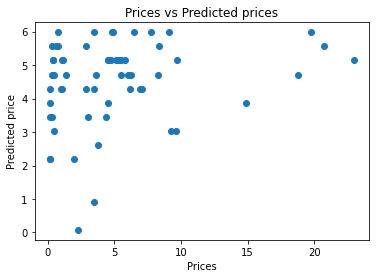

In [42]:
from sklearn.linear_model import LinearRegression
 
lmodellineaire = LinearRegression()
lmodellineaire.fit(X_train, Y_train)

Y_pred = lmodellineaire.predict(X_test)

plt.scatter(Y_test, Y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted price")
plt.title("Prices vs Predicted prices")

25.713611967567978 -844.9349089573319 [0.42187272]


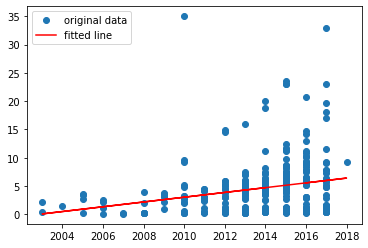

In [38]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(Y_test, Y_pred)

print(mse,lmodellineaire.intercept_,lmodellineaire.coef_)

x = df['Year']
y = df['Selling_Price']

plt.plot(x, y, 'o', label='original data')
plt.plot(x, lmodellineaire.intercept_ + lmodellineaire.coef_*x, 'r', label='fitted line')
plt.legend()
plt.show()